# Ground water level prediction
## Md. Abdullah-Al Mamun
## Mst Nazneen Aktar


# Exploratory data analysis

In [1]:
# Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
IODSOINInaMEI_df= pd.read_excel('D:\Jupyter\Ground water level prediction(Towfiq Sir)\Final Dataset_GWL\Final_IOD_SOI_NIna3.4_MEI.xlsx')  # Specify the header row number
IODSOINInaMEI_df


,Year,Month,IOD VALUE,SOI_Value,Nina3.4_Value,MEI_Value
0,1993,1,-0.025962,-8.2,0.28,0.925
1,1993,2,0.010194,-7.9,0.42,1.049
2,1993,3,-0.323575,-8.5,0.47,1.177
3,1993,4,-0.056840,-21.1,0.92,1.440
4,1993,5,0.312997,-8.2,0.93,1.860
...,...,...,...,...,...,...
295,2017,8,0.362385,3.3,-0.18,-0.436
296,2017,9,0.236626,6.9,-0.56,-0.267
297,2017,10,0.740942,9.1,-0.52,-0.261
298,2017,11,0.278548,11.8,-0.84,-0.379


In [5]:
info = GWL_df.info()
info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           300 non-null    int64  
 1   Month          300 non-null    int64  
 2   IOD VALUE      300 non-null    float64
 3   SOI_Value      300 non-null    float64
 4   Nina3.4_Value  300 non-null    float64
 5   MEI_Value      300 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 14.2 KB


In [6]:
description_data = round(GWL_df.iloc[:, 2:].describe(), 2)
description_data

,IOD VALUE,SOI_Value,Nina3.4_Value,MEI_Value
count,300.00,300.00,300.00,300.00
mean,0.00,-0.48,0.01,-0.01
std,0.35,10.75,0.87,1.04
min,-0.89,-28.60,-1.79,-1.96
25%,-0.20,-7.80,-0.56,-0.77
50%,-0.02,0.10,-0.08,-0.23
75%,0.21,7.70,0.48,0.60
max,1.47,27.10,2.57,3.21


In [7]:
# Checking the missing values in each coulmn
missing_values = GWL_df.isnull().sum()
missing_values

Year             0
Month            0
IOD VALUE        0
SOI_Value        0
Nina3.4_Value    0
MEI_Value        0
dtype: int64

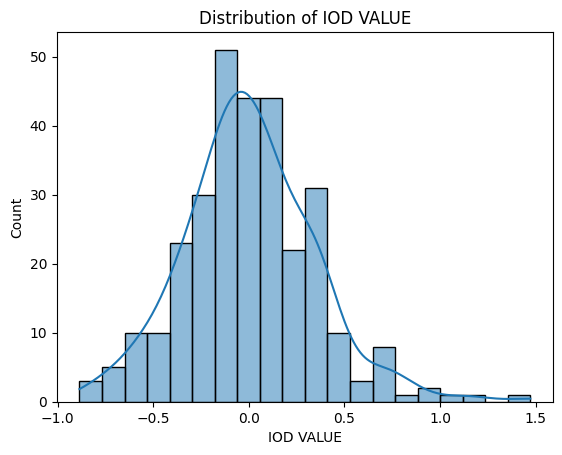

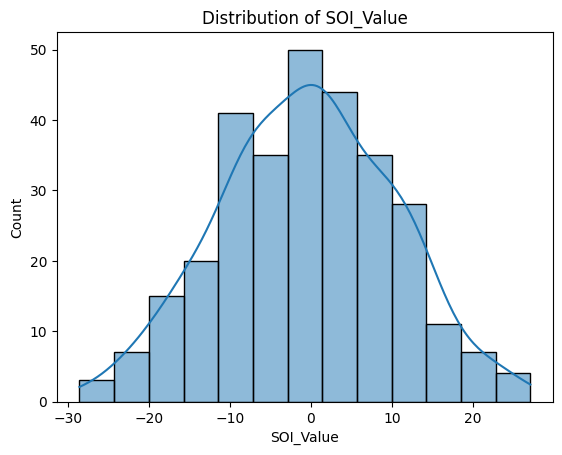

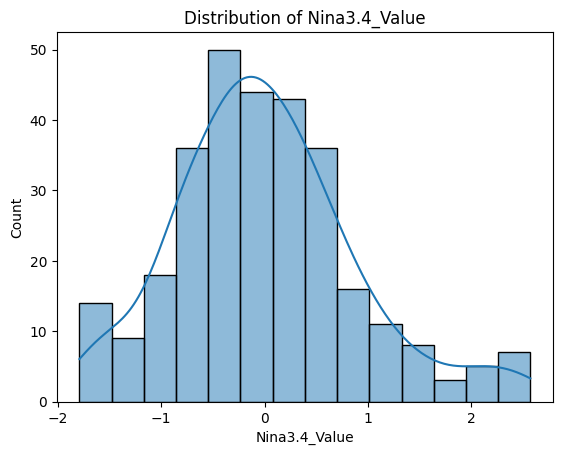

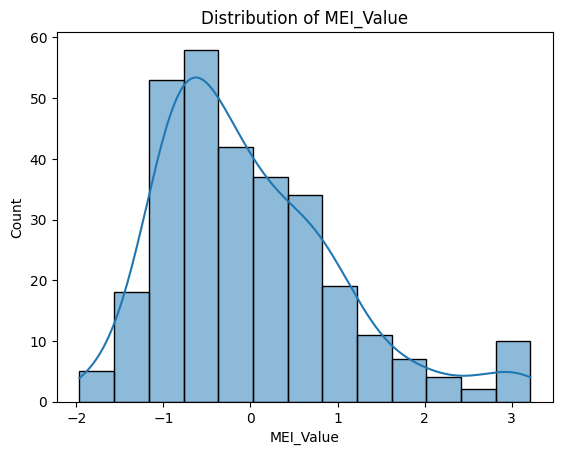

In [8]:
def plot_distribution(GWL_df):
    for column in GWL_df.columns:
        sns.histplot(GWL_df[column], kde=True)
        plt.title(f"Distribution of {column}")
        plt.show()

plot_distribution(GWL_df.iloc[:, 2:])

In [9]:
correlation_matrix = GWL_df.corr()
correlation_matrix

,Year,Month,IOD VALUE,SOI_Value,Nina3.4_Value,MEI_Value
Year,1.000000e+00,4.492787e-15,0.095144,0.152720,0.010795,-0.350908
Month,4.492787e-15,1.000000e+00,-0.019470,0.051125,0.033109,0.020430
IOD VALUE,9.514380e-02,-1.946965e-02,1.000000,-0.281823,0.372122,0.258183
SOI_Value,1.527199e-01,5.112460e-02,-0.281823,1.000000,-0.716575,-0.497944
Nina3.4_Value,1.079470e-02,3.310867e-02,0.372122,-0.716575,1.000000,0.555833
MEI_Value,-3.509079e-01,2.043037e-02,0.258183,-0.497944,0.555833,1.000000


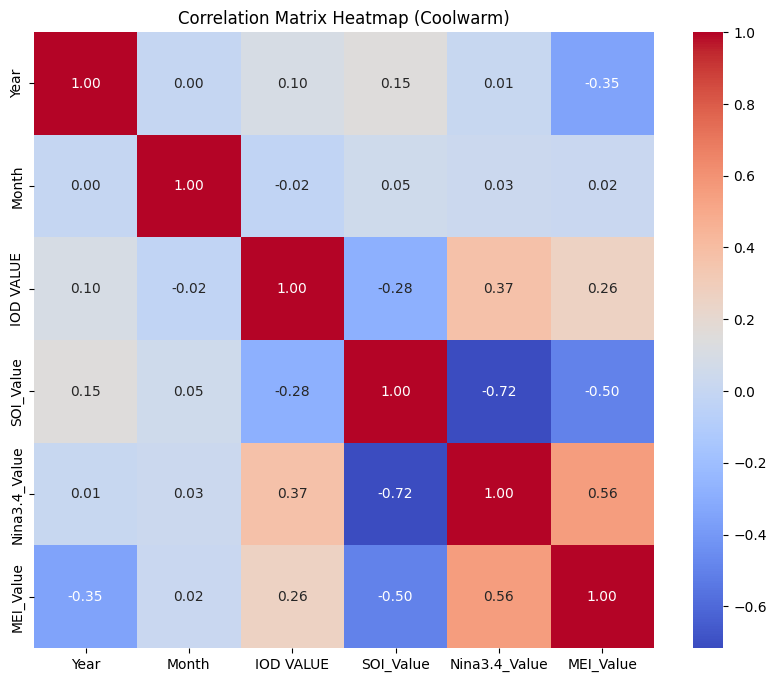

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming GWL_df is your DataFrame
correlation_matrix = GWL_df.corr()

# Create a heatmap with the "coolwarm" color palette
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation Matrix Heatmap (Coolwarm)")
plt.show()


D:\Jupyter\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


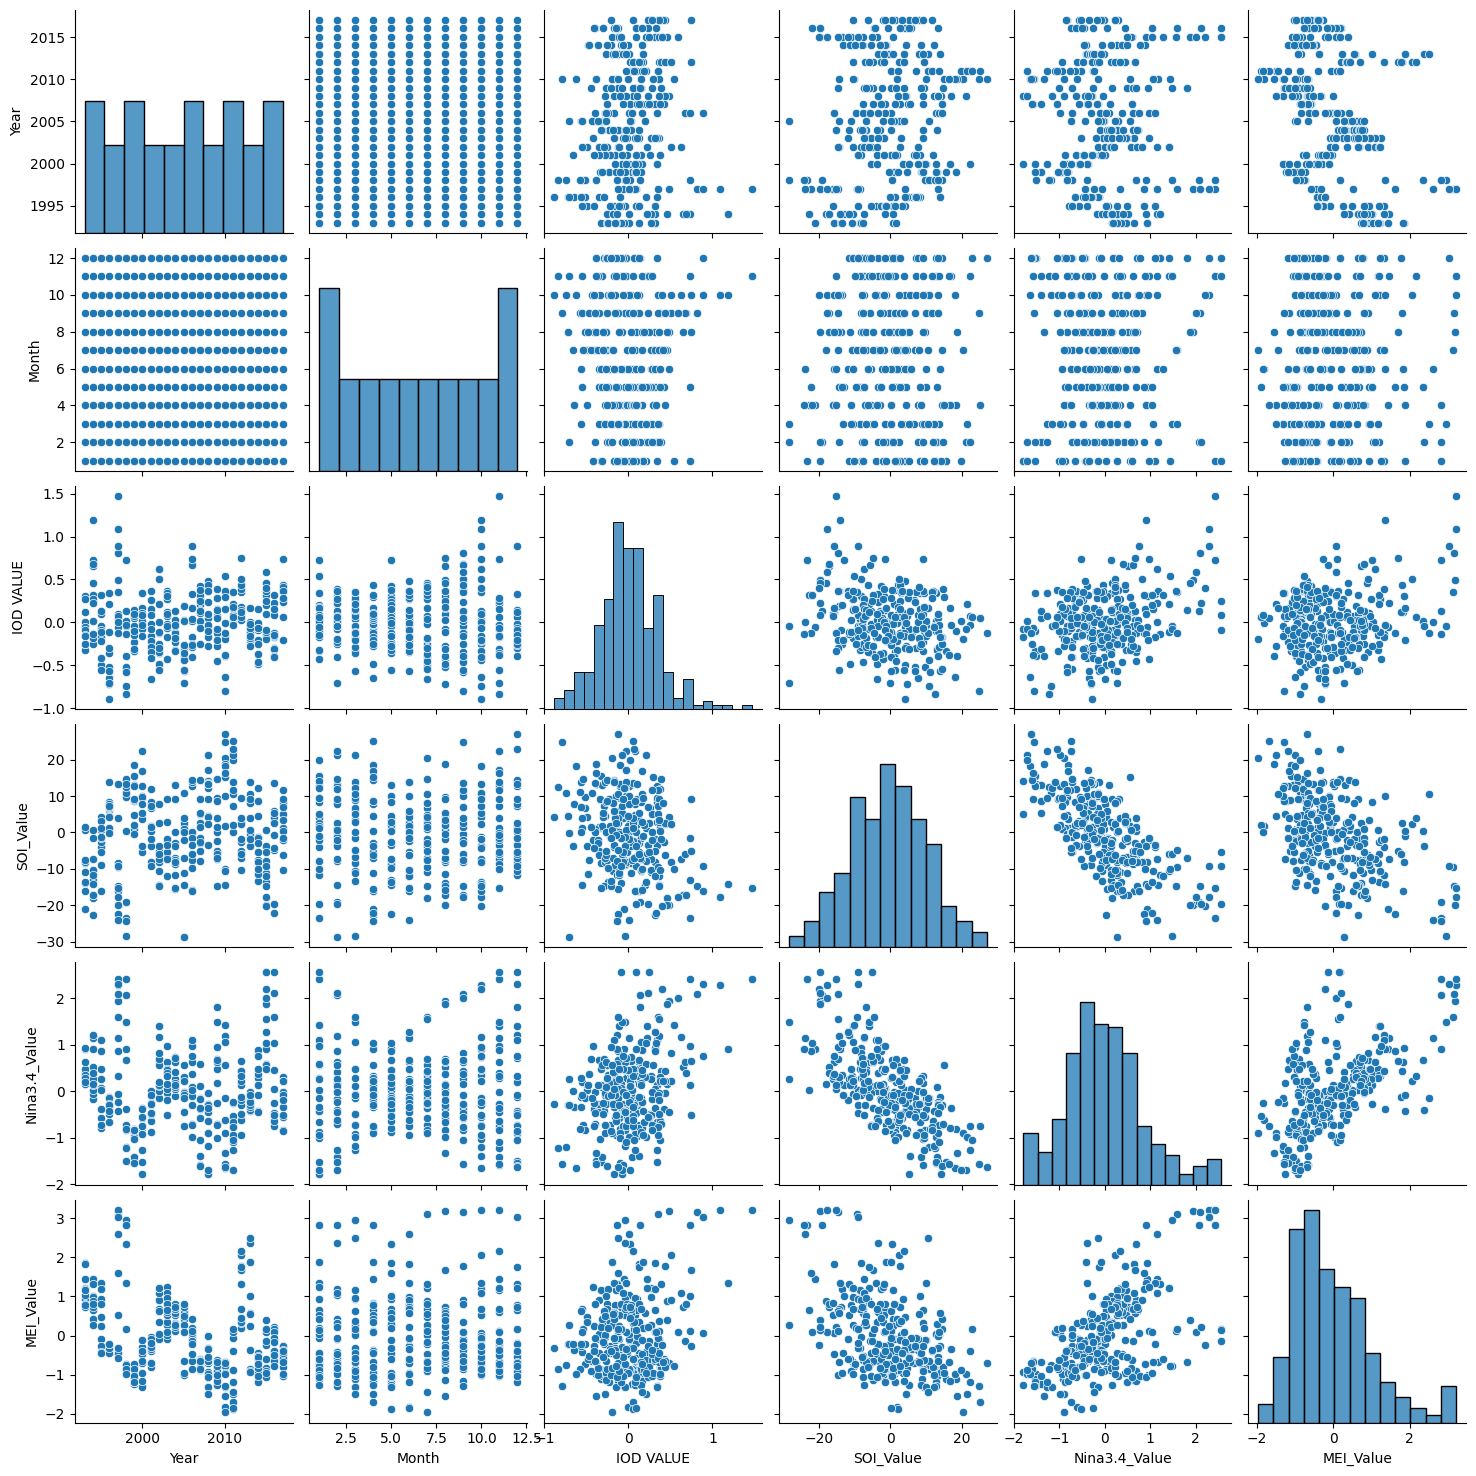

In [11]:
sns.pairplot(GWL_df)
plt.show()

In [12]:
from DataFrame_Checker import DataFrameChecker

#  an instance of DataFrameChecker
checker = DataFrameChecker(GWL_df)

# Called the checking functions
checker.check_errors()

Errors in DataFrame:
No errors found in DataFrame


In [13]:
checker.check_missing_values()

No missing values found in DataFrame


In [14]:
def plot_boxplot_with_outliers(data):
    plt.figure(figsize=(14, 8))
    numeric_columns = data.select_dtypes(include=np.number).columns
    bp = plt.boxplot(data[numeric_columns].values, showfliers=False)
    plt.title('Boxplot')
    plt.ylabel('Values')

    for j, column in enumerate(numeric_columns, 1):
        column_values = data[column].values
        q1 = np.nanpercentile(column_values, 25)
        q3 = np.nanpercentile(column_values, 75)
        iqr = q3 - q1
        outlier_threshold = 1.5 * iqr
        column_outliers = column_values[((column_values < q1 - outlier_threshold) | (column_values > q3 + outlier_threshold))]
        for outlier in column_outliers:
            plt.plot(j, outlier, 'ro', label='Outlier')

    plt.xticks(range(1, len(numeric_columns) + 1), numeric_columns, rotation='vertical')  
    plt.tight_layout() 
    plt.show()


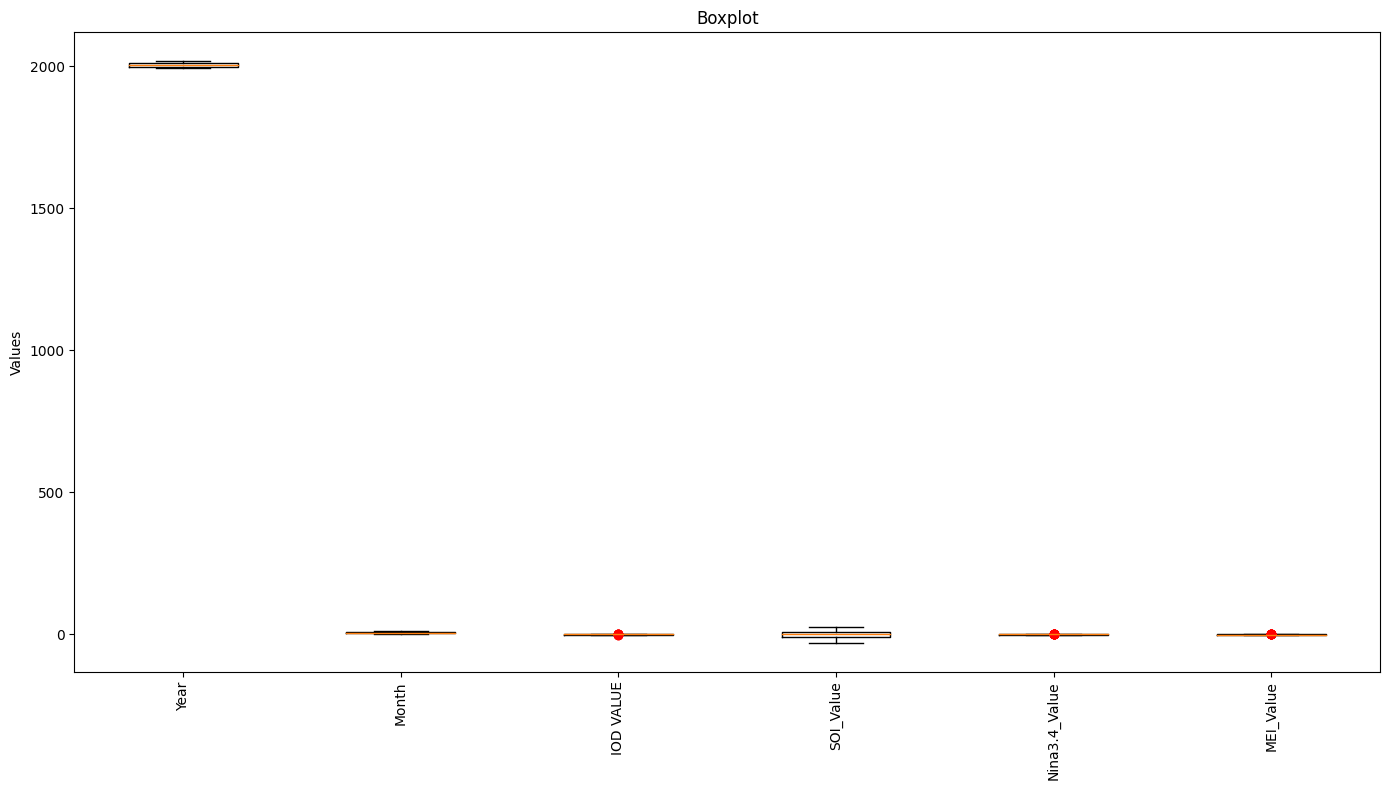

In [15]:
plot_boxplot_with_outliers(GWL_df)

In [16]:
import warnings
from scipy import stats


def detect_outliers(data, threshold=1.5):
    outliers = None
    total_outliers = 0
    
    if pd.api.types.is_numeric_dtype(data):
        alpha = 0.05
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            stat, p = stats.shapiro(data.dropna())

        if p > alpha:
            # Normal distribution, using Z-score method (Shapiro-Wilk test)
            z_scores = np.abs(stats.zscore(data))
            column_outliers = data[z_scores > threshold]
        else:
            # Non-normal distribution, use Tukey's method
            q1 = np.percentile(data, 25)
            q3 = np.percentile(data, 75)
            iqr = q3 - q1
            lower_bound = q1 - threshold * iqr
            upper_bound = q3 + threshold * iqr
            column_outliers = data[(data < lower_bound) | (data > upper_bound)]
        
        if column_outliers is not None:
            outliers = column_outliers
            total_outliers += len(column_outliers)
    
    return outliers, total_outliers


In [17]:
def visualize_outliers(outliers):
    if outliers is not None:
        num_outliers = len(outliers.columns)
        num_rows = (num_outliers + 2) // 3  # Calculate the number of rows needed
        
        fig, axs = plt.subplots(num_rows, 3, figsize=(15, 5*num_rows))
        axs = axs.flatten()  # Flatten the axis array to iterate over it
        
        for i, column in enumerate(outliers.columns):
            ax = axs[i]
            ax.boxplot(outliers[column].values, showfliers=False)
            ax.scatter(range(1, len(outliers)+1), outliers[column].values, color='red', marker='o', label='Outliers')
            ax.set_xlabel('Columns')
            ax.set_ylabel('Values')
            ax.set_title(f'Outliers - {column}')
            ax.legend()
        
        # Remove any unused subplots
        for j in range(num_outliers, len(axs)):
            fig.delaxes(axs[j])
        
        plt.tight_layout()
        plt.show()
    else:
        print('No outliers detected.')


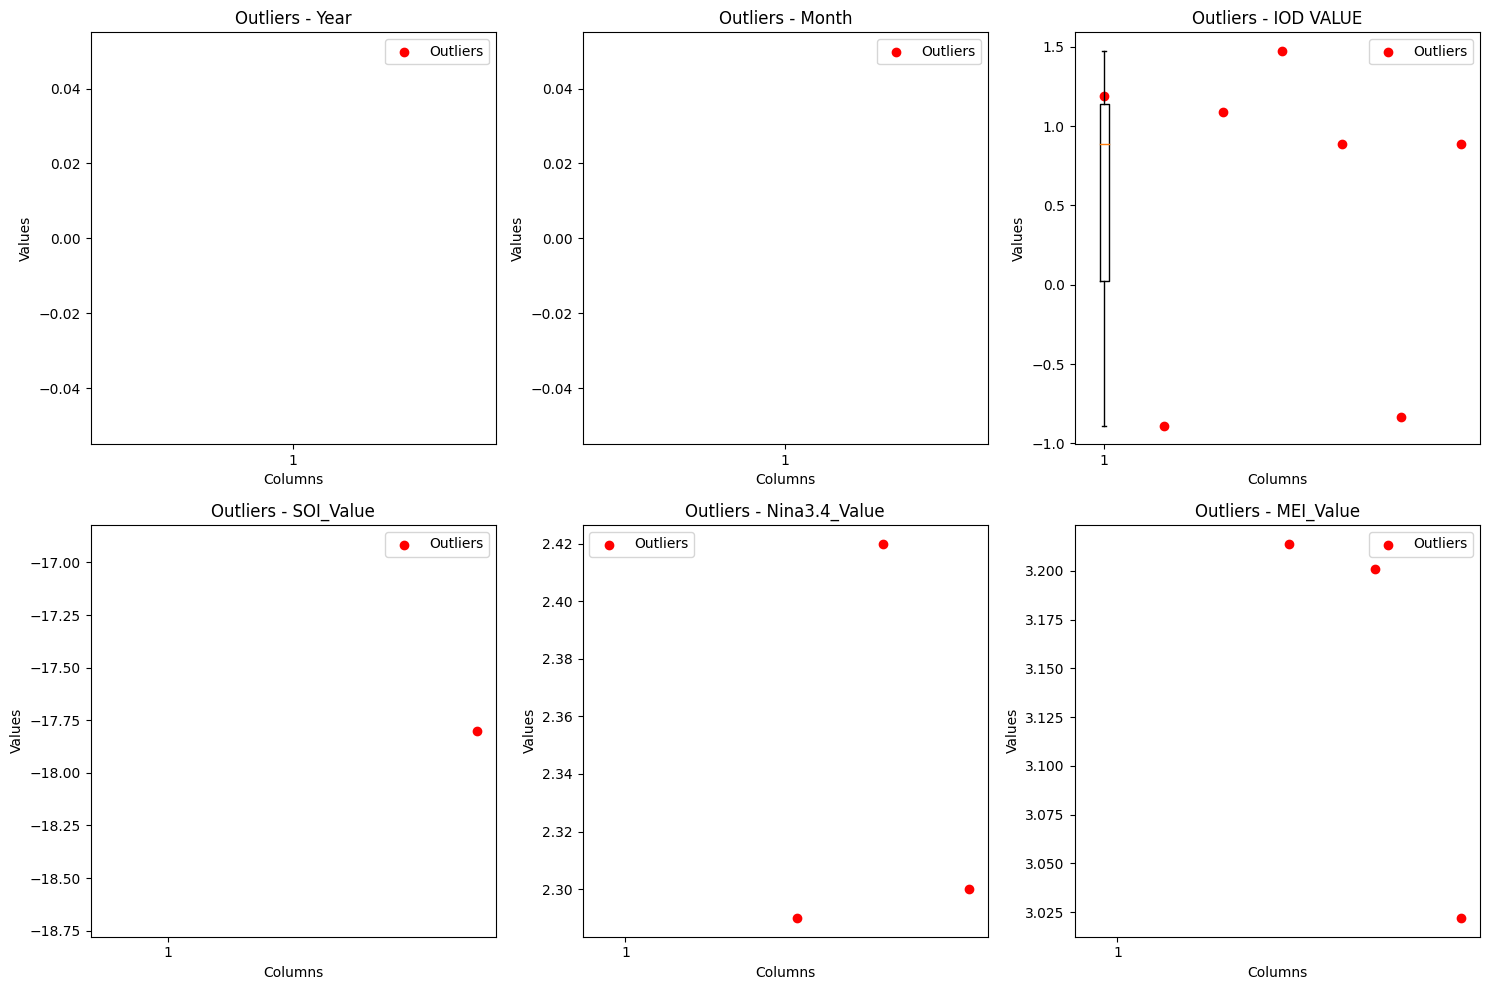

Number of total outliers: 64


In [18]:
# Detect outliers for all numeric columns
all_outliers = pd.DataFrame()
total_outliers = 0
numeric_columns = GWL_df.select_dtypes(include=np.number).columns
for column in numeric_columns:
    column_data = GWL_df[column]
    column_outliers, column_total_outliers = detect_outliers(column_data)
    if column_outliers is not None:
        all_outliers[column] = column_outliers
        total_outliers += column_total_outliers

# Visualize outliers with a maximum of 3 graphs in a row
visualize_outliers(all_outliers)

# Print the number of total outliers in all columns
print("Number of total outliers:", total_outliers)

In [19]:
from plotting_library import*

# Checking if transformation is needed
check_transformation_needed(GWL_df)

Transformation recommended for column: Year
Transformation recommended for column: Month
Transformation recommended for column: IOD VALUE
Transformation recommended for column: SOI_Value
No transformation needed for column: Nina3.4_Value
Transformation recommended for column: MEI_Value


D:\Jupyter\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
D:\Jupyter\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
